In [9]:
'''
NAME
    NetCDF with Python
PURPOSE
    To demonstrate how to read and write data with NetCDF files using
    a NetCDF file from the NCEP/NCAR Reanalysis.
    Plotting using Matplotlib and Basemap is also shown.
PROGRAMMER(S)
    Chris Slocum
REVISION HISTORY
    20140320 -- Initial version created and posted online
    20140722 -- Added basic error handling to ncdump
                Thanks to K.-Michael Aye for highlighting the issue
REFERENCES
    netcdf4-python -- http://code.google.com/p/netcdf4-python/
    NCEP/NCAR Reanalysis -- Kalnay et al. 1996
        http://dx.doi.org/10.1175/1520-0477(1996)077<0437:TNYRP>2.0.CO;2
'''

'\nNAME\n    NetCDF with Python\nPURPOSE\n    To demonstrate how to read and write data with NetCDF files using\n    a NetCDF file from the NCEP/NCAR Reanalysis.\n    Plotting using Matplotlib and Basemap is also shown.\nPROGRAMMER(S)\n    Chris Slocum\nREVISION HISTORY\n    20140320 -- Initial version created and posted online\n    20140722 -- Added basic error handling to ncdump\n                Thanks to K.-Michael Aye for highlighting the issue\nREFERENCES\n    netcdf4-python -- http://code.google.com/p/netcdf4-python/\n    NCEP/NCAR Reanalysis -- Kalnay et al. 1996\n        http://dx.doi.org/10.1175/1520-0477(1996)077<0437:TNYRP>2.0.CO;2\n'

In [10]:
import datetime as dt  # Python standard library datetime  module
import numpy as np
import netCDF4  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

In [11]:
import sys
print(sys.executable)

C:\Users\sgeo\AppData\Local\Continuum\anaconda3\envs\py36\python.exe


In [12]:
def ncdump(nc_fid, verb=True):
    '''
    ncdump outputs dimensions, variables and their attribute information.
    The information is similar to that of NCAR's ncdump utility.
    ncdump requires a valid instance of Dataset.

    Parameters
    ----------
    nc_fid : netCDF4.Dataset
        A netCDF4 dateset object
    verb : Boolean
        whether or not nc_attrs, nc_dims, and nc_vars are printed

    Returns
    -------
    nc_attrs : list
        A Python list of the NetCDF file global attributes
    nc_dims : list
        A Python list of the NetCDF file dimensions
    nc_vars : list
        A Python list of the NetCDF file variables
    '''
    def print_ncattr(key):
        """
        Prints the NetCDF file attributes for a given key

        Parameters
        ----------
        key : unicode
            a valid netCDF4.Dataset.variables key
        """
        try:
            print( "\t\ttype:", repr(nc_fid.variables[key].dtype))
            for ncattr in nc_fid.variables[key].ncattrs():
                print( '\t\t%s:' % ncattr,\
                      repr(nc_fid.variables[key].getncattr(ncattr)))
        except KeyError:
            print( "\t\tWARNING: %s does not contain variable attributes" % key)

    # NetCDF global attributes
    nc_attrs = nc_fid.ncattrs()
    if verb:
        print( "NetCDF Global Attributes:")
        for nc_attr in nc_attrs:
            print( '\t%s:' % nc_attr, repr(nc_fid.getncattr(nc_attr)))
    nc_dims = [dim for dim in nc_fid.dimensions]  # list of nc dimensions
    # Dimension shape information.
    if verb:
        print( "NetCDF dimension information:")
        for dim in nc_dims:
            print( "\tName:", dim) 
            print( "\t\tsize:", len(nc_fid.dimensions[dim]))
            print_ncattr(dim)
    # Variable information.
    nc_vars = [var for var in nc_fid.variables]  # list of nc variables
    if verb:
        print( "NetCDF variable information:")
        for var in nc_vars:
            if var not in nc_dims:
                print( '\tName:', var)
                print( "\t\tdimensions:", nc_fid.variables[var].dimensions)
                print( "\t\tsize:", nc_fid.variables[var].size)
                print_ncattr(var)
    return nc_attrs, nc_dims, nc_vars

In [13]:
nc_f = './Downloads/c_gls_FAPAR300-RT0_201905310000_GLOBE_PROBAV_V1.0.1.nc'  # Your filename


In [14]:
nc_fid = netCDF4.Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
nc_attrs, nc_dims, nc_vars = ncdump(nc_fid)
# Extract data from NetCDF file
lats = nc_fid.variables['lat'][:]  # extract/copy the data
lons = nc_fid.variables['lon'][:]

NetCDF Global Attributes:
	Conventions: 'CF-1.6'
	long_name: 'Fraction of Absorbed Photosynthetically Active Radiation'
	processing_mode: 'Near real time'
	references: 'http://land.copernicus.eu/global/products/fapar'
	platform: 'Proba-V'
	copyright: 'Copernicus Service information 2019'
	source: 'Derived from EO satellite imagery'
	archive_facility: 'VITO'
	sensor: 'VEGETATION'
	processing_level: 'L3'
	product_version: 'V1.0.1'
	time_coverage_start: '2018-11-02T00:00:00Z'
	institution: 'VITO NV'
	parent_identifier: 'urn:cgls:global:fapar300_v1_333m'
	time_coverage_end: '2019-05-31T23:59:59Z'
	title: '10-daily Fraction of Absorbed Photosynthetically Active Radiation 333M: GLOBE 2019-05-31T00:00:00Z'
	orbit_type: 'LEO'
	identifier: 'urn:cgls:global:fapar300_v1_333m:FAPAR300-RT0_201905310000_GLOBE_PROBAV_V1.0.1'
	history: 'Processing line GEO3.0: 2019-06-03'
NetCDF dimension information:
	Name: lon
		size: 120960
		type: dtype('float64')
		standard_name: 'longitude'
		long_name: 'longitu

In [15]:
fapar = nc_fid.variables['FAPAR']  # shape is ???, 
type(fapar)

netCDF4._netCDF4.Variable

In [16]:
nc_fid.variables.keys()

odict_keys(['lon', 'lat', 'crs', 'FAPAR', 'LENGTH_AFTER', 'LENGTH_BEFORE', 'NOBS', 'QFLAG', 'RMSE'])

In [17]:
len(fapar)

47040

In [18]:
fapar[1]

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=255,
            dtype=float32)

In [19]:
np.ndim(fapar)

2

In [20]:
type(lats)

numpy.ma.core.MaskedArray

In [21]:
lats.size

47040

In [23]:
np.ndim(lats)

1

In [24]:
lons.size

120960

In [25]:
np.ndim(lons)

1

In [26]:
lats[1:10]

masked_array(data=[79.99702381, 79.99404762, 79.99107143, 79.98809524,
                   79.98511905, 79.98214286, 79.97916667, 79.97619048,
                   79.97321429],
             mask=False,
       fill_value=1e+20)

In [27]:
lons[1:10]

masked_array(data=[-179.99702381, -179.99404762, -179.99107143,
                   -179.98809524, -179.98511905, -179.98214286,
                   -179.97916667, -179.97619048, -179.97321429],
             mask=False,
       fill_value=1e+20)

In [28]:
# South of everything except Antarctica
np.min(lats)

-59.997023809491964

In [29]:
# North of almost everything
np.max(lats)

80.0

In [30]:
# International dateline from east to west
np.min(lons)

-180.0

In [31]:
# International dateline from west to east
np.max(lons)

179.9970238111609

In [32]:
# Resolution? 0.0174532925199433 ?
lats[1] - lats[2]

0.0029761904761897995

In [33]:
lons[1] - lons[2]

-0.0029761904762040103


### California is between West 125 (-125 lon) and 114 (-114 lon), and 32 N and 42 N (32 and 42 lat)
Get to a course grid of CA:

In [41]:
lons[18500]

-124.94047619022581

In [45]:
lons[22250]

-113.77976190446077

In [53]:
lats[12750]

42.05357142858006

In [60]:
lats[16250]

31.63690476191576

In [67]:
fapar_ca = fapar[12750:16250]

In [68]:
type(fapar_ca)

numpy.ma.core.MaskedArray

In [69]:
fapar_ca.size

0

In [70]:
fapar[12750:16250]

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=255,
  dtype=float32)

In [71]:
lats_ca = lats[12750:16250]
np.min(lats_ca)

31.639880952391948

In [72]:
np.max(lats_ca)

42.05357142858006

In [74]:
lons_ca = lons[18500:22250]
np.min(lons_ca)

-124.94047619022581

In [75]:
np.max(lons_ca)

-113.78273809493697

In [77]:
fapar_intermed = fapar[12750:16250]
type(fapar_intermed)

numpy.ma.core.MaskedArray

In [78]:
fapar_intermed.size

423360000

In [79]:
fapar_intermed.ndim

2

In [82]:
fapar_intermed.shape

(3500, 120960)

In [83]:
fapar_ca = fapar_intermed[:,18500:22250]
type(fapar_ca)

numpy.ma.core.MaskedArray

In [84]:
fapar_ca.size

13125000

In [85]:
fapar_ca.shape

(3500, 3750)

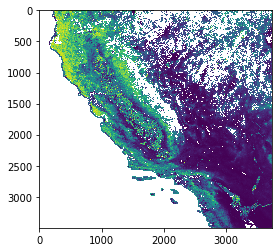

In [86]:
plt.imshow(fapar_ca)